# Convolution

In [24]:
import numpy as np
import scipy

a = np.array([1, 2, 3, 4, 5, 6, 7])
b = np.array([1, 2, 3])
print(np.convolve(a, b, 'full'))  # M + N - 1
print(np.convolve(a, b, 'same'))  # max(M,N)
print(np.convolve(a, b, 'valid'))  # max(M,N) - min(M,N) + 1, when overlap completely

print(scipy.signal.convolve(a, b, mode='full', method='fft'))
print(scipy.signal.convolve(a, b, mode='same', method='fft'))
print(scipy.signal.convolve(a, b, mode='valid', method='direct'))

[ 1  4 10 16 22 28 34 32 21]
[ 4 10 16 22 28 34 32]
[10 16 22 28 34]
[ 1  4 10 16 22 28 34 32 21]
[ 4 10 16 22 28 34 32]
[10 16 22 28 34]


In [ ]:
a = np.ones((7, 7))
b = np.ones((3, 3))
np.convolve(a, b, 'valid')  # error, for 1-D arrays only

# Correlate

In [25]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
b = np.array([1, 2, 3])
print(np.correlate(a, b, 'full'))  # M + N - 1
print(scipy.signal.correlate(a, b, mode='full', method='fft'))

[ 3  8 14 20 26 32 38 20  7]
[ 3  8 14 20 26 32 38 20  7]


# Corr Coefficient

[[ 1. -1.]
 [-1.  1.]]
999
-100


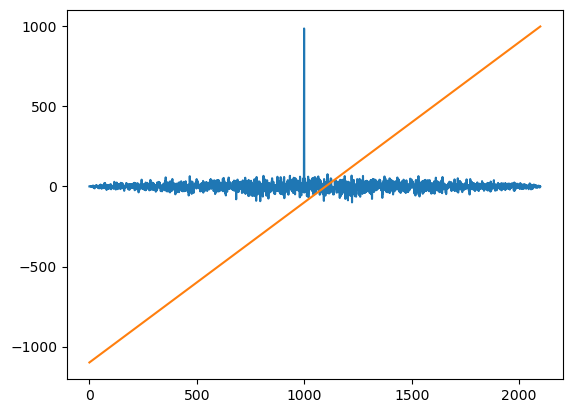

In [40]:
import matplotlib.pyplot as plt
from scipy import signal
from numpy.random import default_rng

rng = default_rng()
x = rng.standard_normal(1000)
y = np.concatenate([rng.standard_normal(100), x])

# numpy
print(np.corrcoef(np.arange(0, 6, 1), np.arange(6, 0, -1)))  # Corr Coefficient matrix

# scipy
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")  # get lags for the result of correlation
plt.plot(correlation)
plt.plot(lags)

lag = lags[np.argmax(correlation)]
print(np.argmax(correlation))
print(lag)  # y is the 'delayed' version of x, latency = 100

# Filter
## FIR